In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ac = np.loadtxt('A5_data/ac.txt')
s = np.loadtxt('A5_data/s.txt')
time = np.loadtxt('A5_data/time.txt')
fs = 1/(time[1]-time[0])

df = pd.DataFrame({'time':time, 's':s, 'ac':ac})

# Question 1

Obtain the times and the data.

In [3]:
times = df['time'][df['time']<=20]
ss= df['s'][df['time']<=20]
acs= df['ac'][df['time']<=20]

Plot

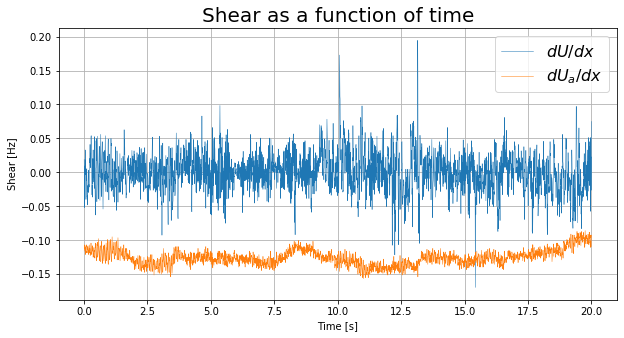

In [33]:
plt.figure(figsize=(10,5))
plt.plot(times, ss, label='$dU/dx$', lw=0.5)
plt.plot(times, acs, label='$dU_a/dx$', lw=0.5)
plt.legend(fontsize=16)
plt.xlabel('Time [s]')
plt.ylabel('Shear [Hz]')
plt.title('Shear as a function of time', fontsize=20)
plt.grid()

plt.show()

Lets qualitatively compare the data:

* There is more variance seen in $dU/dx$ than in $dU_a/dx$. This makes sense: $dU_a/dx$ measures vibrations of the instrument that contaminate $dU/dx$. The vibrations in this case contribute less to the total sheer measured than then actual physical process measured (sheers measured by the sheer probe).

* There are a few large spikes in $dU/dx$ (seen at approximately 10s, 13s, and 15.5s) not seen in $dU_a/dx$. This suggests that these spikes are due to the ocean turbulence and not due to vibrations of the instrument.

* $dU_a/dx$: There is a clear high frequency seen, but most of the variance of this signal appears to come from lower frequencies that are present. 

* $dU_dx$: Most of the variance here appears to come from some sort of high-ish frequency observed throughout the entire time series. As we will later see, this frequency is around 50Hz

* Note that $dU_a/dx$ does not have a mean of 0 shear while $dU_dx$ does have a mean of zero shear.

# Question 2

Note: Throughout this assignment, "nperseg" is the equivalent of "nfft" which you mention in your assignment. 
this is because nfft defaults to nperseg. See https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.welch.html for more information. 

In [5]:
from scipy.signal import welch

Below we use...

* hanning windows as our taper with npserseg/2 overlap. 
*  zero padding since the time series is not always a multiple of nperseg. Note that scipy uses zero padding when nperseg is not a multiple of the time series.
 

In [83]:
# Compute for dat.s
ff_s1, spec_s1 = welch(s, fs=fs, nperseg=64, window='hann') 
ff_s2, spec_s2 = welch(s, fs=fs, nperseg=256, window='hann') 
ff_s3, spec_s3 = welch(s, fs=fs, nperseg=2560, window='hann') 
ff_s4, spec_s4 = welch(s, fs=fs, nperseg=24000, window='hann') 

# Compute for dat.ac
ff_ac1, spec_ac1 = welch(ac, fs=fs, nperseg=64, window='hann') 
ff_ac2, spec_ac2 = welch(ac, fs=fs, nperseg=256, window='hann') 
ff_ac3, spec_ac3 = welch(ac, fs=fs, nperseg=2560, window='hann') 
ff_ac4, spec_ac4 = welch(ac, fs=fs, nperseg=24000, window='hann') 

Plot.

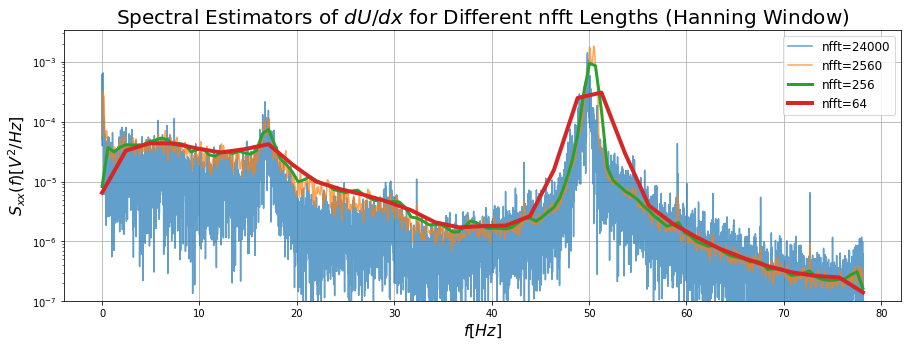

In [84]:
plt.figure(figsize=(15,5))
plt.semilogy(ff_s4, spec_s4, alpha=0.7, label='nfft=24000')
plt.semilogy(ff_s3, spec_s3, alpha=0.7, label='nfft=2560')
plt.semilogy(ff_s2, spec_s2, lw=3, label='nfft=256')
plt.semilogy(ff_s1, spec_s1, lw=4, label='nfft=64')
plt.ylim(bottom=10**(-7))
plt.grid()
plt.legend(fontsize=12)
plt.ylabel(r'$S_{xx}(f)  [V^2/Hz]$', fontsize=16)
plt.xlabel(r'$f [Hz]$', fontsize=16)
plt.title('Spectral Estimators of $dU/dx$ for Different nfft Lengths (Hanning Window)', fontsize=20)
plt.show()

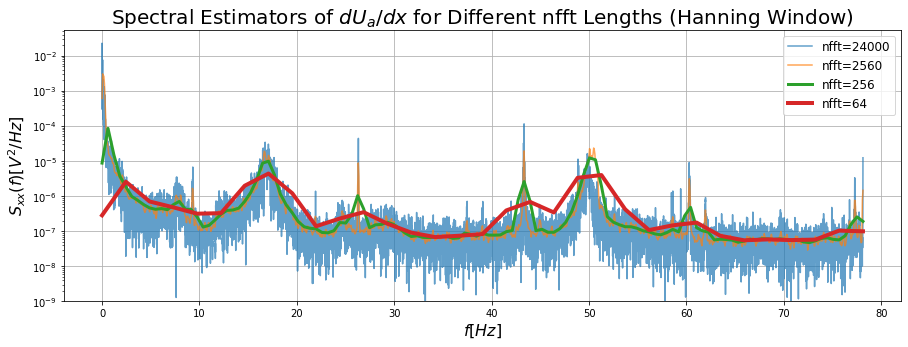

In [85]:
plt.figure(figsize=(15,5))
plt.semilogy(ff_ac4, spec_ac4, alpha=0.7, label='nfft=24000')
plt.semilogy(ff_ac3, spec_ac3, alpha=0.7, label='nfft=2560')
plt.semilogy(ff_ac2, spec_ac2, lw=3, label='nfft=256')
plt.semilogy(ff_ac1, spec_ac1, lw=4, label='nfft=64')
plt.ylim(bottom=10**(-9))
plt.grid()
plt.legend(fontsize=12)
plt.ylabel(r'$S_{xx}(f)  [V^2/Hz]$', fontsize=16)
plt.xlabel(r'$f [Hz]$', fontsize=16)
plt.title('Spectral Estimators of $dU_a/dx$ for Different nfft Lengths (Hanning Window)', fontsize=20)
plt.show()

Lets check to make sure this definition of the spectrum is indeed the definition you gave us: i.e. the integral of the spectrum should yield the variance of $s$ (assuming $s$ has zero mean- which it basically does).

In [86]:
np.var(s)

0.0023982981542625013

Lets check the spectra:

In [87]:
print('Variance from nperseg=64 is {}'.format(sum(spec_s1)*(ff_s1[1]-ff_s1[0])))
print('Variance from nperseg=256 is {}'.format(sum(spec_s2)*(ff_s2[1]-ff_s2[0])))
print('Variance from nperseg=2560 is {}'.format(sum(spec_s3)*(ff_s3[1]-ff_s3[0])))
print('Variance from nperseg=24000 is {}'.format(sum(spec_s4)*(ff_s4[1]-ff_s4[0])))

Variance from nperseg=64 is 0.002285464117037285
Variance from nperseg=256 is 0.0023243783560650544
Variance from nperseg=2560 is 0.0022487410868057126
Variance from nperseg=24000 is 0.0007914163656323695


Note that the npserseg=24000 spectrum underestimates the variance: this is due to zero-padding used in the scipy procedure. We can do the same test with the ac data set.

In [88]:
np.var(ac-np.mean(ac))

0.0010867773231812284

In [89]:
print('Variance from nperseg=64 is {}'.format(sum(spec_ac1)*(ff_ac1[1]-ff_ac1[0])))
print('Variance from nperseg=256 is {}'.format(sum(spec_ac2)*(ff_ac2[1]-ff_ac2[0])))
print('Variance from nperseg=2560 is {}'.format(sum(spec_ac3)*(ff_ac3[1]-ff_ac3[0])))
print('Variance from nperseg=24000 is {}'.format(sum(spec_ac4)*(ff_ac4[1]-ff_ac4[0])))

Variance from nperseg=64 is 5.7452742223186806e-05
Variance from nperseg=256 is 0.0001205558631867668
Variance from nperseg=2560 is 0.0007661419842409422
Variance from nperseg=24000 is 0.0006423113217734421


Note that we vastly underestimate the variance for nfft=64. This is due to the fact that the spectrum of $dU_a/dx$ has significant energy at low frequencies; when we use a small window with a hanning taper, we lose energy at these low frequencies. The estimate for the variance gets better as we approach npserseg =  256 and 2560, but then it drops again at 24000. This, again, is due to the zero padding procedure used by scipy.

# Question 3

Here we show the effects of aliasing. Theoretically we know that

$$\hat{S_{x_t}}(f) = \sum_{k=-\infty}^\infty S_{x(t)}(f+k/\Delta t)$$

where $x_t$ is our discretely sampled time series, $x(t)$ is our true continuous process, $\hat{S_{x_t}}$ is the spectral estimator (obtained using $x_t$) of true spectrum  $S_{x(t)}$  and $\Delta t = 1/f$ where $f$ is our sampling frequency. For a normal spectrum, we don't take the sum from $-\infty$ to $\infty$, we might only choose a few intervals of $k$. 

Note that we are dealing with spectral estimators, not the true spectra. Thus the forumla above holds to some approximation.   We show the effects of aliasing in two ways

* We sub sample the time series and plot the spectrum  <mark>(**what you asked of us**)</mark>
* We manually "flip in" the spectrum using the formula above. In other words, we take the spectrum for the normally sampled time series, split it up into many intervals, and add the intervals together (flipping some as required, as we are considering a 1-sided PSD). <mark>(**bonus**)</mark>

The functions defined below are used for my second bullet point above.

In [13]:
def split_padded(a,n):
    padding = len(a)//n - len(a)%n
    return np.split(np.concatenate((a,np.zeros(padding))),(n+1))

def fold_in(prdg, scale):
    f = split_padded(prdg, scale)
    N = len(f[0])
    
    ff = np.linspace(0, 1/2, N) *fs/scale
    new_prdg = f[0]
    for (i, arr) in enumerate(f[1:]):
        if i%2 == 1:
            new_prdg += arr
        else:
            new_prdg += np.flip(arr)
    
    
    return ff, new_prdg

Compute the regular spectrum, the spectrum of the sub sampled time series, and the "flipped-in" spectrum.

In [14]:
s_subsamp = s[::10]

ff_s, spec_s = welch(s, fs=fs, nperseg=2560, noverlap=0, window='hann') 
ff_ssub, spec_ssub = welch(s_subsamp, fs=fs/10, nperseg=256, window='hann') 
ff_ssub_theo, spec_ssub_theo = fold_in(spec_s, 10) 

Plot full spectrum.

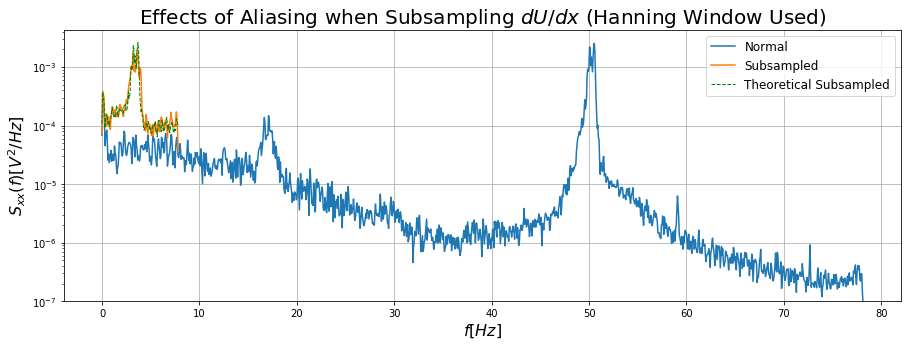

In [15]:
plt.figure(figsize=(15,5))

plt.semilogy(ff_s, spec_s, label='Normal')
plt.semilogy(ff_ssub, spec_ssub,  label='Subsampled')
plt.semilogy(ff_ssub_theo, spec_ssub_theo, label='Theoretical Subsampled', ls='--', lw=1, c='green')

plt.ylim(bottom=10**(-7))
plt.grid()
plt.legend(fontsize=12)
plt.ylabel(r'$S_{xx}(f)  [V^2/Hz]$', fontsize=16)
plt.xlabel(r'$f [Hz]$', fontsize=16)
plt.title('Effects of Aliasing when Subsampling $dU/dx$ (Hanning Window Used)', fontsize=20)
plt.show()

Plot area of interest.

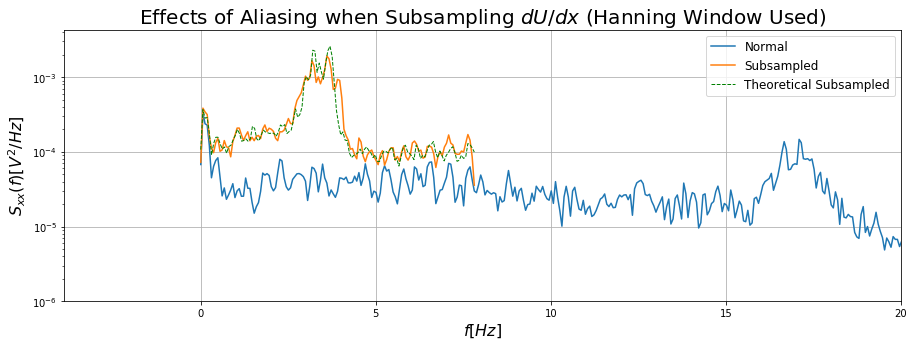

In [16]:
plt.figure(figsize=(15,5))

plt.semilogy(ff_s, spec_s, label='Normal')
plt.semilogy(ff_ssub, spec_ssub,  label='Subsampled')
plt.semilogy(ff_ssub_theo, spec_ssub_theo, label='Theoretical Subsampled', ls='--', lw=1, c='green')

plt.ylim(bottom=10**(-6))
plt.grid()
plt.legend(fontsize=12)
plt.ylabel(r'$S_{xx}(f)  [V^2/Hz]$', fontsize=16)
plt.xlabel(r'$f [Hz]$', fontsize=16)
plt.title('Effects of Aliasing when Subsampling $dU/dx$ (Hanning Window Used)', fontsize=20)
plt.xlim(right=20)
plt.show()

Note that the theoretical subsampled spectrum and subsampled spectrum don't match perfectly. This is because we are looking at *estimators* of the spectrum above, and 

$$\hat{S_{x_t}}(f) = \sum_{k=-\infty}^\infty S_{x(t)}(f+k/\Delta t)$$

only holds for the true spectrum (estimators introduce bias (leakage) and variance in frequency estimates). Note also that we have much more power in lower frequencies in the subsampled spectrum.

Now we compute the variance (as the integral of the spectrum). Note that it should *not* change because we have folded back power into the lower frequency region.

In [17]:
print('Variance from Normal is {}'.format(sum(spec_s)*(ff_s[1]-ff_s[0])))
print('Variance from Sub-sampled is {}'.format(sum(spec_ssub)*(ff_ssub[1]-ff_ssub[0])))
print('Variance from Theoretical Sub-sampled is {}'.format(sum(spec_ssub_theo)*(ff_ssub_theo[1]-ff_ssub_theo[0])))

Variance from Normal is 0.002341632036528753
Variance from Sub-sampled is 0.002247658392573995
Variance from Theoretical Sub-sampled is 0.0023600700840604783


These should be equal to the variance of $s$ (approximately).

In [18]:
np.var(s)

0.0023982981542625013

and they are indeed! 

# Question 4

Use a running mean for smoothing

In [19]:
v = 1/(10) * (np.zeros(10)+1)
s_smooth = np.convolve(s, v, mode='same') # keep time series same length
s_smooth_sub = s_smooth[::10]

ffs_smooth_sub, specs_smooth_sub = welch(s_smooth_sub, fs=fs/10, nperseg=256, noverlap=0, window='hann') 

Plot the signal

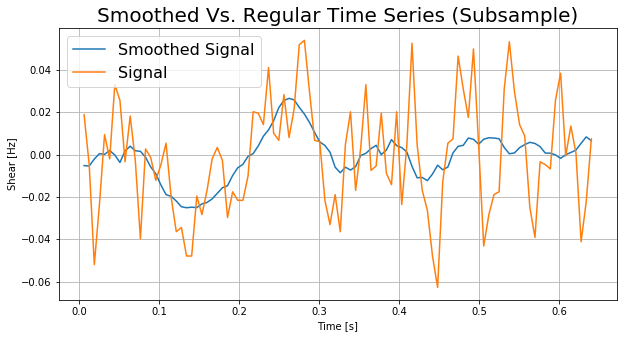

In [20]:
plt.figure(figsize=(10,5))
plt.plot(time[0:100], s_smooth[0:100], label='Smoothed Signal')
plt.plot(time[0:100], s[0:100], label='Signal')
plt.legend(fontsize=16)
plt.xlabel('Time [s]')
plt.ylabel('Shear [Hz]')
plt.title('Smoothed Vs. Regular Time Series (Subsample)', fontsize=20)
plt.grid()

plt.show()

Compare the spectra. Plot full spectrum.

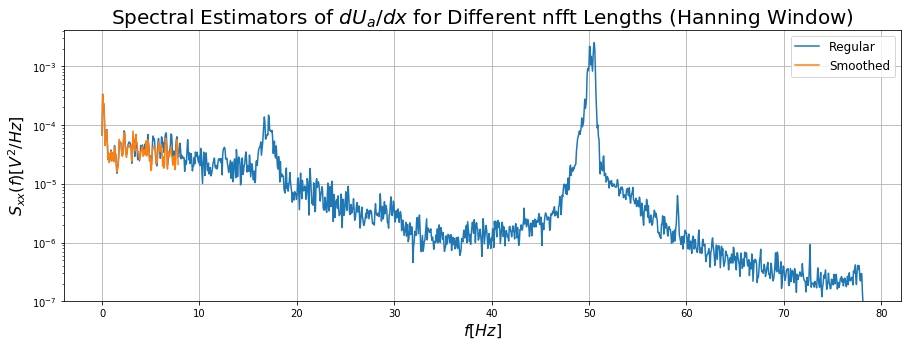

In [21]:
plt.figure(figsize=(15,5))
plt.semilogy(ff_s, spec_s, label='Regular')
plt.semilogy(ffs_smooth_sub, specs_smooth_sub, label='Smoothed')
plt.ylim(bottom=10**(-7))
plt.grid()
plt.legend(fontsize=12)
plt.ylabel(r'$S_{xx}(f)  [V^2/Hz]$', fontsize=16)
plt.xlabel(r'$f [Hz]$', fontsize=16)
plt.title('Spectral Estimators of $dU_a/dx$ for Different nfft Lengths (Hanning Window)', fontsize=20)
plt.show()

Plot area of interest.

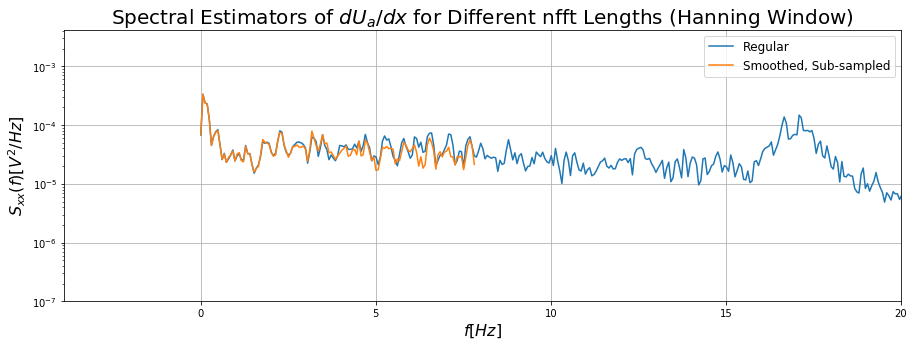

In [22]:
plt.figure(figsize=(15,5))
plt.semilogy(ff_s, spec_s, label='Regular')
plt.semilogy(ffs_smooth_sub, specs_smooth_sub, label='Smoothed, Sub-sampled')
plt.xlim(right=20)
plt.ylim(bottom=10**(-7))
plt.grid()
plt.legend(fontsize=12)
plt.ylabel(r'$S_{xx}(f)  [V^2/Hz]$', fontsize=16)
plt.xlabel(r'$f [Hz]$', fontsize=16)
plt.title('Spectral Estimators of $dU_a/dx$ for Different nfft Lengths (Hanning Window)', fontsize=20)
plt.show()

Unlike question 3, we no longer have more power in lower frequencies in the subsampled spectrum In other words, no "folding back" of the spectrum has occurred, which 

$$\hat{S_{x_t}}(f) = \sum_{k=-\infty}^\infty S_{x(t)}(f+k/\Delta t)$$ 

predicts. Why is this the case? This is due to the fact that the discrete time series $x_t$ has been filtered such that the power in all frequencies above the new nyquist frequency $1/(2 \Delta t_{new}) = 1/(20 \Delta t) = 7.8125 \text{Hz}$ are removed. This is charateristic of the fact that the integral is a low pass filter (the running mean is an "effective" discrete integral). Thus the smoothed time series loses energy at these higher frequencies, so we should expect a lower variance estimate.

In [23]:
print('Variance of s: {}'.format(np.var(s)))
print('Variance from Normal is {}'.format(sum(spec_s)*(ff_s[1]-ff_s[0])))
print('Variance from Smoothed, Sub-sampled is {}'.format(sum(specs_smooth_sub)*(ffs_smooth_sub[1]- ffs_smooth_sub[0])))

Variance of s: 0.0023982981542625013
Variance from Normal is 0.002341632036528753
Variance from Smoothed, Sub-sampled is 0.00034407847295414963


As expected, the variance estimate of the time series has decreased due to filtering.

# Question 5

Obtain the active and quiet phases of $s$.

In [24]:
times_act = time[(time>=200)&(time<=250)]
s_act = s[(time>=200)&(time<=250)]

times_qui = time[(time>=50)&(time<=100)]
s_qui = s[(time>=50)&(time<=100)]

Plot the differences

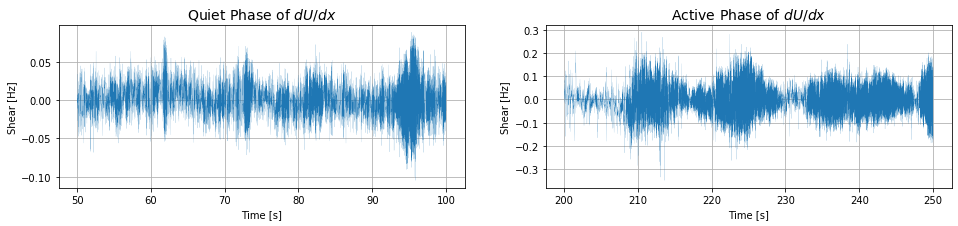

In [25]:
fig, axes = plt.subplots(1,2,figsize=(16,3))

ax = axes[0]
ax.plot(times_qui, s_qui, lw=0.1)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Shear [Hz]')
ax.set_title('Quiet Phase of $dU/dx$', fontsize=14)
ax.grid()

ax = axes[1]
ax.plot(times_act, s_act, lw=0.1)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Shear [Hz]')
ax.set_title('Active Phase of $dU/dx$', fontsize=14)
ax.grid()

There are a few differences between these two plots:
 * The active phase appears to have more energy at some low frequency (this is apparent in the lobes of the active phase plot). While there are lobes in the quiet phase plot, they are not as prevalent (relative to the other frequencies).
 * The upper and lower bounds on the quiet phase plot (-0.05 Hz and 0.05 Hz) are smaller than the upper and lower bounds on the active phase plot (-0.3 Hz and 0.3 Hz). This suggests that there is more variance in the active phase plot, and accordingly that a difference process is taking place between the two time frames.

Obtain the spectra.

In [26]:
ff_s_act, spec_s_act = welch(s_act, fs=fs, nperseg=256, noverlap=0, window='hann') 
ff_s_qui, spec_s_qui = welch(s_qui, fs=fs, nperseg=256, noverlap=0, window='hann') 

Plot.

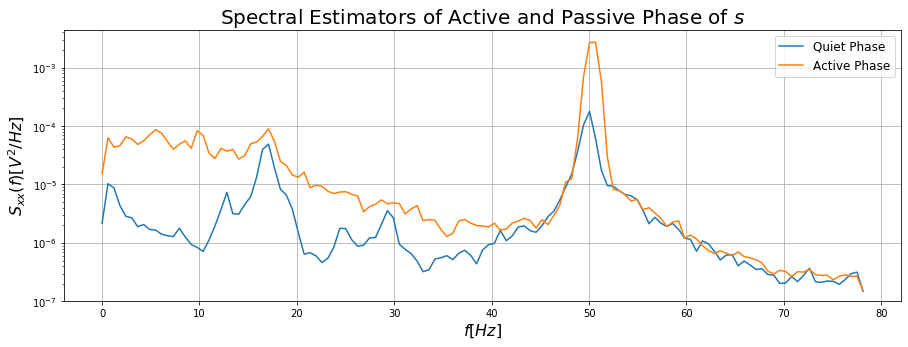

In [27]:
plt.figure(figsize=(15,5))
plt.semilogy(ff_s_qui, spec_s_qui, label='Quiet Phase')
plt.semilogy(ff_s_act, spec_s_act, label='Active Phase')
plt.ylim(bottom=10**(-7))
plt.grid()
plt.legend(fontsize=12)
plt.ylabel(r'$S_{xx}(f)  [V^2/Hz]$', fontsize=16)
plt.xlabel(r'$f [Hz]$', fontsize=16)
plt.title('Spectral Estimators of Active and Passive Phase of $s$', fontsize=20)
plt.show()

The differences are

* **Low Frequency Region**: The active phase appears to have more energy in all lower frequencies up to around 45Hz. This observation supports the claim we made above when comparing the time series: there are low frequency lobes present in the active phase that are not as apparent in the quiet phase.
* **Mid Frequency Spike**: The active phase has about 10 times more energy in the frequency spike of 50Hz. This suggests that something in the physical process occurs at around 50Hz. Note that this spike is still visibile in the quiet phase, suggesting that it always takes place.
* **High Frequency Range**: Above 55Hz, the two spectra are approximately equal. What ever is occuing in the "active" phase does not occur at high frequencies. 

# Question 6

In [28]:
from scipy.signal import coherence

Obtain active and quiet data.

In [29]:
times_act = time[(time>=200)&(time<=250)]
s_act = s[(time>=200)&(time<=250)]
ac_act = ac[(time>=200)&(time<=250)]

times_qui = time[(time>=50)&(time<=100)]
s_qui = s[(time>=50)&(time<=100)]
ac_qui = ac[(time>=50)&(time<=100)]

Obtain coherence estimates.

In [30]:
ff_act, cohere_act = coherence(s_act, ac_act, fs=fs, nperseg=256, window='hann') 
ff_qui, cohere_qui = coherence(s_qui, ac_qui, fs=fs, nperseg=256, window='hann') 

Plot.

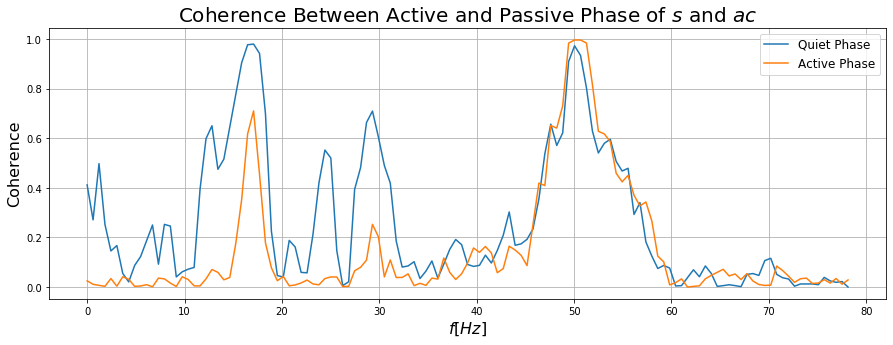

In [31]:
plt.figure(figsize=(15,5))
plt.plot(ff_qui, cohere_qui, label='Quiet Phase')
plt.plot(ff_act, cohere_act, label='Active Phase')
plt.grid()
plt.legend(fontsize=12)
plt.ylabel(r'Coherence', fontsize=16)
plt.xlabel(r'$f [Hz]$', fontsize=16)
plt.title('Coherence Between Active and Passive Phase of $s$ and $ac$', fontsize=20)
plt.show()

Which is more coherent: The active of the passive region?:

* **In the quiet phase**, $s$ is more coherent with $ac$ at lower frequencies, up to around 35Hz. This suggests that during the inactive phase at this frequency range, the sheer data is (relatively) more affected by vibrations of the instrument than during the active phase. Recall that during the inactive phase the sheer signal $dU/dx$ is less strong as well.

* **In active region**, $s$ is almost entirely coherent with $ac$ at 55Hz. Since the sheer data and accelerometer data are almost perfectly coherent, some process is likely driving both data sets in this region. $s$ and $ac$ are not quite as coherent during the inactive phase, but the coherence is still large. Note that this is true *despite* the $s$ signal being significantly weaker during the inactive phase.

There are essentially two differences here

* **Low Frequencies**: The two signals are more coherent in quiet phase due to the accelerometer affecting the sheer data.
* **50 Hz**: The two signals are more coherent in the active phase due to the physical process driving both the sheer data and the accelerometer data.